In [8]:
# ls

data/       extract_utils.py  __pycache__/
extract.py  __init__.py       revisited_carotid_mini.ipynb


In [1]:
# # parameters
# DATASET="mutinfo_train_mini"
# MODEL="dino_vits8"
# MATRIX="laplacian"
# DOWNSAMPLE=8
# N_SEG=5
# N_ERODE=2
# N_DILATE=5

In [2]:
# # extract features
# !python extract.py extract_features \
#     --images_list {"./data/"+DATASET+"/lists/images.txt"} \
#     --images_root {"./data/"+DATASET+"/images"} \
#     --output_dir {"./data/"+DATASET+"/features/"+MODEL} \
#     --model_name {MODEL} \
#     --batch_size 1

In [3]:
# # Extract eigenvectors of the Laplacian matrix of our features
# !python extract.py extract_eigs \
#     --images_root {"./data/"+DATASET+"/images"} \
#     --features_dir {"./data/"+DATASET+"/features/"+MODEL} \
#     --which_matrix "laplacian" \
#     --output_dir {"./data/"+DATASET+"/eigs"} \
#     --K {N_SEG}

In [10]:
N_SEG=15
N_ERODE=2
DOWNSAMPLE=8
N_DILATE=5

(15, 930)
(15, 31, 30)


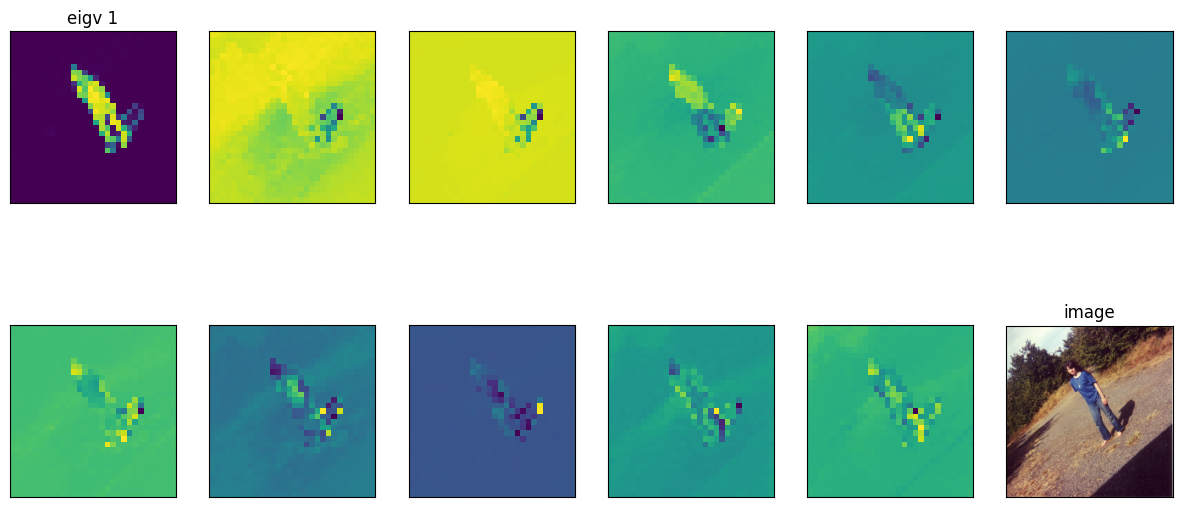

In [3]:
import torch
import numpy as np
from PIL import Image

dir="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/images/trainval/JPEGImages/"
image_name="2007_000027"
image_path=dir+image_name+".jpg"
im = np.array(Image.open(image_path))
eigs_path="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/eigs/laplacian_dino_vits16/"+image_name+".pth"
feat_path="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/features/dino_vits16/"+image_name+".pth"
data_dict = torch.load(feat_path, map_location='cpu')
data_dict.update(torch.load(eigs_path, map_location='cpu'))
eigenvectors = data_dict['eigenvectors'][:N_SEG].numpy()
print(eigenvectors.shape)

import extract_utils as utils
B, C, H, W, P, H_patch, W_patch, H_pad, W_pad = utils.get_image_sizes(data_dict)

eigenvectors_img=eigenvectors.reshape(N_SEG, H_patch, W_patch)
print(eigenvectors_img.shape)


import matplotlib.pyplot as plt
# plt.axis('off')

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 7))
# fig.set_dpi(512)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = ax.flatten()
ax1.imshow(eigenvectors_img[1])
ax1.title.set_text("eigv 1")
ax2.imshow(eigenvectors_img[2])
ax3.imshow(eigenvectors_img[3])
ax4.imshow(eigenvectors_img[4])
ax5.imshow(eigenvectors_img[5])
ax6.imshow(eigenvectors_img[6])
ax7.imshow(eigenvectors_img[7])
ax8.imshow(eigenvectors_img[8])
ax9.imshow(eigenvectors_img[9])
ax10.imshow(eigenvectors_img[10])
# ax11.imshow(im)
# ax11.title.set_text("image")
ax11.imshow(eigenvectors_img[11])
ax12.imshow(im)
ax12.title.set_text("image")
# remove the x and y ticks
for a in ax.flatten():
    a.set_xticks([])
    a.set_yticks([])
plt.show()

In [4]:
# (1) Extract segments
!python extract.py extract_multi_region_segmentations \
    --features_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/features/dino_vits16/"} \
    --eigs_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/eigs/laplacian_dino_vits16/"} \
    --output_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_segmentation/laplacian_dino_vits16/segmaps"} \
    --adaptive False \
    --non_adaptive_num_segments {N_SEG} \

100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.17it/s]
Finished in 4.6s


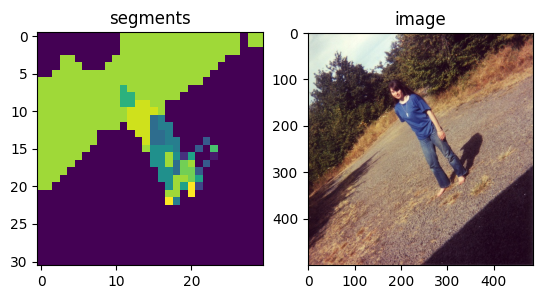

In [8]:
# visualisation
cmap = 'tab20'
dir="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_segmentation/laplacian_dino_vits16/segmaps/"
segm_path=dir+image_name+".png"
segm = np.array(Image.open(segm_path))

fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()

ax1.imshow(segm)
ax1.title.set_text("segments")
ax2.imshow(im)
ax2.title.set_text("image")
plt.imsave(dir + image_name + '_color' + '.png', segm, cmap=cmap)

plt.show()

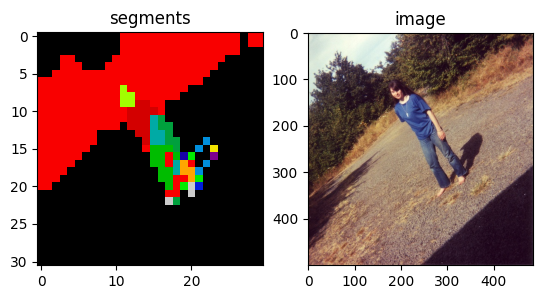

In [6]:
# imporivng different segments visibility
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()

ax1.imshow(segm, cmap="nipy_spectral")
ax1.title.set_text("segments")
ax2.imshow(im, cmap="viridis")
ax2.title.set_text("image")
plt.show()

In [12]:
# (2) Extract bounding boxes
!python extract.py extract_bboxes \
    --features_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/features/dino_vits16/"} \
    --segmentations_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_segmentation/laplacian_dino_vits16/segmaps"} \
    --num_erode {N_ERODE} \
    --num_dilate {N_DILATE} \
    --downsample_factor {DOWNSAMPLE} \
    --output_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bboxes.pth"}

Extracting bounding boxes: 100%|████████████████| 10/10 [00:00<00:00, 93.74it/s]
Done


In [15]:
# (3) Extract bounding box features
!python extract.py extract_bbox_features \
    --model_name {"dino_vits16"} \
    --images_root {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/images/trainval/JPEGImages/"} \
    --bbox_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bboxes.pth"} \
    --output_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_features.pth"}

Loaded bounding box list. There are 138 total bounding boxes.
Using cache found in /home/phdcs2/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to /home/phdcs2/.cache/torch/hub/checkpoints/dino_deitsmall16_pretrain.pth
100%|██████████████████████████████████████| 82.7M/82.7M [00:08<00:00, 9.99MB/s]
100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  6.43it/s]
Saved features to /home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_features.pth


In [16]:
# (4) Extract clusters
!python extract.py extract_bbox_clusters \
    --bbox_features_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_features.pth"} \
    --output_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_clusters.pth"} \
    --num_clusters {N_SEG}

Loaded bounding box list. There are 138 total bounding boxes with features.
Stacking and normalizing features
Computing K-Means clustering with 15 clusters
/home/phdcs2/Hard_Disk/Projects/T2I/deep-spectral-segmentation/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Cluster indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Cluster counts: [7, 14, 15, 11, 12, 8, 14, 13, 11, 6, 14, 3, 6, 3, 1]
Saved features to /home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_clusters.pth


In [17]:
# (5) Create semantic segmentations
!python extract.py extract_semantic_segmentations \
    --segmentations_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_segmentation/laplacian_dino_vits16/segmaps/"} \
    --bbox_clusters_file {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_bboxes/bbox_clusters.pth"} \
    --output_dir {"/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/semantic_segmentations/patches/laplacian_dino_vits16/segmaps"}

Loaded bounding box list. There are 138 total bounding boxes with features and clusters.
100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 435.54it/s]
Saved features to /home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/semantic_segmentations/patches/laplacian_dino_vits16/segmaps


In [21]:
# crf segmentations
!python extract.py extract_crf_segmentations \
--images_list "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/lists/images.txt" \
--images_root "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/images/trainval/JPEGImages" \
--segmentations_dir "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/multi_region_segmentation/laplacian_dino_vits16/segmaps" \
--output_dir "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/semantic_segmentations/crf/laplacian_dino_vits16/segmaps" \
--output_dir_color "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/semantic_segmentations/crf/laplacian_dino_vits16/color_segmaps" \
--downsample_factor 16 \
--num_classes 20

Found 10 images and segmaps
100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]
Finished in 4.6s


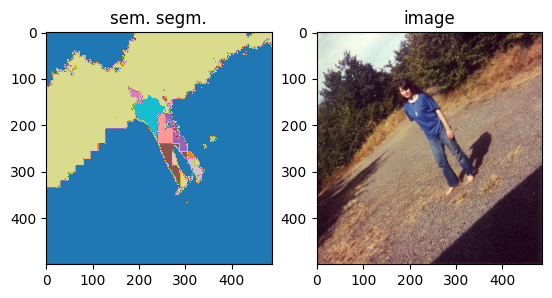

In [23]:
# visualize semantic segmentation
semseg_path="/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/VOC2012_10/srg/semantic_segmentations/crf/laplacian_dino_vits16/segmaps/"
semseg_im_path=semseg_path+image_name+".png"
semsegm_im = np.array(Image.open(semseg_im_path))
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()

ax1.imshow(semsegm_im, cmap="tab20")
ax1.title.set_text("sem. segm.")
ax2.imshow(im)
ax2.title.set_text("image")

plt.show()